In [10]:
from itertools import combinations
from scipy.stats import bootstrap
import numpy as np
import pickle


import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({"font.size" : 15,
                     "figure.dpi" : 100, 
                     "grid.alpha" : 0.3, 
                     "axes.grid": True, 
                     "axes.axisbelow" : True,
                     "figure.figsize":(8,6),
                     "mathtext.fontset":"cm",
                     "xtick.labelsize": 14,
                     "ytick.labelsize": 14,
                     "axes.labelsize": 16, 
                     "legend.fontsize": 13.5})
USE_TEX = False
if USE_TEX:
    plt.rc("text", usetex=True)
    plt.rc("text.latex", preamble=r"""
     \usepackage{times}
     \usepackage{mathptmx}""")
else:
    plt.rc("text", usetex=False)
plt.rc("font", family="serif")

In [2]:
labels = ["MPT (Holme-Kim)", "MPT (Random)", "CPT (Holme-Kim)", "CPT (Random)"]
comparisons = list(combinations(labels, 2))
comparisons

[('MPT (Holme-Kim)', 'MPT (Random)'),
 ('MPT (Holme-Kim)', 'CPT (Holme-Kim)'),
 ('MPT (Holme-Kim)', 'CPT (Random)'),
 ('MPT (Random)', 'CPT (Holme-Kim)'),
 ('MPT (Random)', 'CPT (Random)'),
 ('CPT (Holme-Kim)', 'CPT (Random)')]

# Confidence Interval Comparison (individual level)

In [6]:
with open("category_count_results_individual.pickle", "rb") as f:
    individual_results = pickle.load(f)
individual_results.keys()

dict_keys(['MPT (Holme-Kim)', 'MPT (Random)', 'CPT (Holme-Kim)', 'CPT (Random)'])

In [15]:
for category in range(7):
    for c in comparisons:
        c1, c2 = c
        c1_data = np.array(individual_results[c1][category])
        c2_data = np.array(individual_results[c2][category])
        res1 = bootstrap((c1_data,), np.mean)
        res2 = bootstrap((c2_data,), np.mean)
        if (res1.confidence_interval[1] < res2.confidence_interval[0]) or \
           (res1.confidence_interval[0] > res2.confidence_interval[1]) or \
           ((np.std(c1_data) == 0 or np.std(c2_data) == 0) and c1_data[0]!=c2_data[0]):
            print(f"{c1} and {c2} are significantly different for category {category}.")

MPT (Holme-Kim) and CPT (Holme-Kim) are significantly different for category 0.
MPT (Holme-Kim) and CPT (Random) are significantly different for category 0.
MPT (Random) and CPT (Holme-Kim) are significantly different for category 0.
MPT (Random) and CPT (Random) are significantly different for category 0.
MPT (Holme-Kim) and CPT (Holme-Kim) are significantly different for category 1.
MPT (Holme-Kim) and CPT (Random) are significantly different for category 1.
MPT (Random) and CPT (Holme-Kim) are significantly different for category 1.
MPT (Random) and CPT (Random) are significantly different for category 1.
MPT (Holme-Kim) and CPT (Holme-Kim) are significantly different for category 2.
MPT (Holme-Kim) and CPT (Random) are significantly different for category 2.
MPT (Random) and CPT (Holme-Kim) are significantly different for category 2.
MPT (Random) and CPT (Random) are significantly different for category 2.
CPT (Holme-Kim) and CPT (Random) are significantly different for category 2.

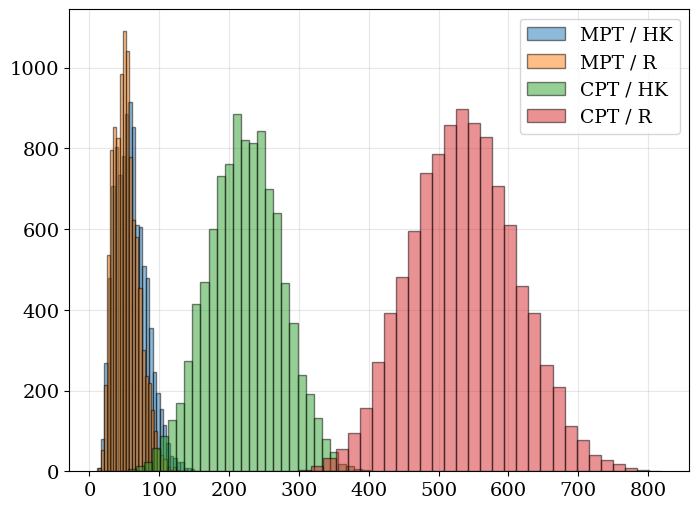

In [29]:
cat = 6

w = np.array(individual_results["MPT (Holme-Kim)"][cat])
x = np.array(individual_results["MPT (Random)"][cat])
y = np.array(individual_results["CPT (Holme-Kim)"][cat])
z = np.array(individual_results["CPT (Random)"][cat])

res_w = bootstrap((w,), np.mean)
res_x = bootstrap((x,), np.mean)
res_y = bootstrap((y,), np.mean)
res_z = bootstrap((z,), np.mean)

labels = ["MPT / HK", "MPT / R", "CPT / HK", "CPT / R"]
for i,item in enumerate([res_w, res_x, res_y, res_z]):
    plt.hist(item.bootstrap_distribution, alpha=0.5, edgecolor="k", bins=30, label=labels[i])
plt.legend()
plt.show()

# Confidence Interval Comparison (community level)

In [18]:
with open("category_count_results_communities.pickle", "rb") as f:
    community_results = pickle.load(f)

In [19]:
for category in range(7):
    for c in comparisons:
        c1, c2 = c
        c1_data = np.array(community_results[c1][category])
        c2_data = np.array(community_results[c2][category])
        res1 = bootstrap((c1_data,), np.mean)
        res2 = bootstrap((c2_data,), np.mean)
        if (res1.confidence_interval[1] < res2.confidence_interval[0]) or \
           (res1.confidence_interval[0] > res2.confidence_interval[1]) or \
           ((np.std(c1_data) == 0 or np.std(c2_data) == 0) and c1_data[0]!=c2_data[0]):
            print(f"{c1} and {c2} are significantly different for category {category}.")

MPT (Holme-Kim) and CPT (Holme-Kim) are significantly different for category 0.
MPT (Holme-Kim) and CPT (Random) are significantly different for category 0.
MPT (Random) and CPT (Holme-Kim) are significantly different for category 0.
MPT (Random) and CPT (Random) are significantly different for category 0.
CPT (Holme-Kim) and CPT (Random) are significantly different for category 0.
MPT (Holme-Kim) and MPT (Random) are significantly different for category 1.
MPT (Holme-Kim) and CPT (Random) are significantly different for category 1.
MPT (Random) and CPT (Holme-Kim) are significantly different for category 1.
MPT (Random) and CPT (Random) are significantly different for category 1.
MPT (Holme-Kim) and MPT (Random) are significantly different for category 2.
MPT (Holme-Kim) and CPT (Holme-Kim) are significantly different for category 2.
MPT (Holme-Kim) and CPT (Random) are significantly different for category 2.
MPT (Random) and CPT (Holme-Kim) are significantly different for category 2.

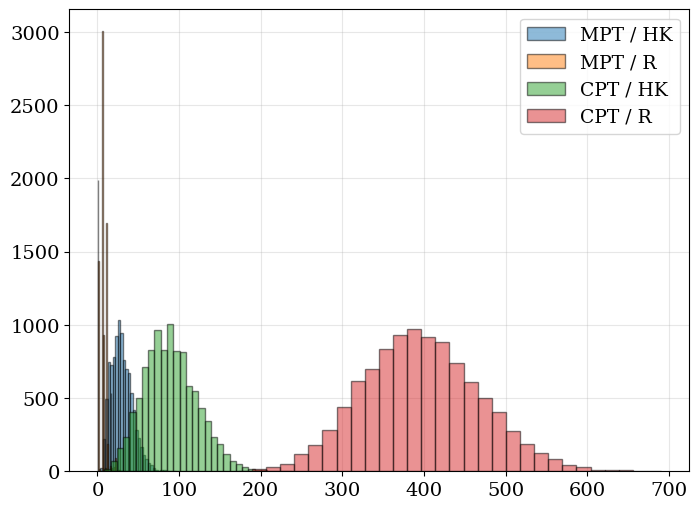

In [34]:
cat = 6

w = np.array(community_results["MPT (Holme-Kim)"][cat])
x = np.array(community_results["MPT (Random)"][cat])
y = np.array(community_results["CPT (Holme-Kim)"][cat])
z = np.array(community_results["CPT (Random)"][cat])

res_w = bootstrap((w,), np.mean)
res_x = bootstrap((x,), np.mean)
res_y = bootstrap((y,), np.mean)
res_z = bootstrap((z,), np.mean)

labels = ["MPT / HK", "MPT / R", "CPT / HK", "CPT / R"]
for i,item in enumerate([res_w, res_x, res_y, res_z]):
    plt.hist(item.bootstrap_distribution, alpha=0.5, edgecolor="k", bins=30, label=labels[i])
plt.legend()
plt.show()